# Analysis from the PCM monitor

Currently, analysing -
- IPC (Instructions per cycle)
- Cache Miss and Cache Hits/Miss Ratio

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

sys.path.append(os.path.abspath(os.path.join("..")))
from parsers.pcm_parser import get_csv
from utils.utils import *

In [2]:
EXPERIMENT_DIRNAME = "BuzzBlogBenchmark_2022-01-30-22-32-14"

## Log Parsing

Reading CSV and removing the unnecessary "Unnamed" column, adding a Timestamp column (removing individual System Date and System Time columns), and add a Node Name column.

In [3]:
combined_csv = pd.concat([get_csv(node_name, logfile) for node_name, logfile in get_experiment_pcm_logfiles(EXPERIMENT_DIRNAME)])
print(combined_csv.shape)

(447887, 594)


Filtering the automatic garbage introduced by reading CSV

In [4]:
system_stats = combined_csv.loc[:, :'UncFREQ (Ghz) SKT0']
system_stats['Node Name'] = combined_csv['Node Name']
start_time = get_experiment_start_time(EXPERIMENT_DIRNAME)
system_stats['Timestamp'] = system_stats.apply(lambda r: (r['Timestamp'] - start_time).total_seconds(), axis=1)
system_stats.set_index('Timestamp', inplace=True)


## Plotting Graphs

### IPC

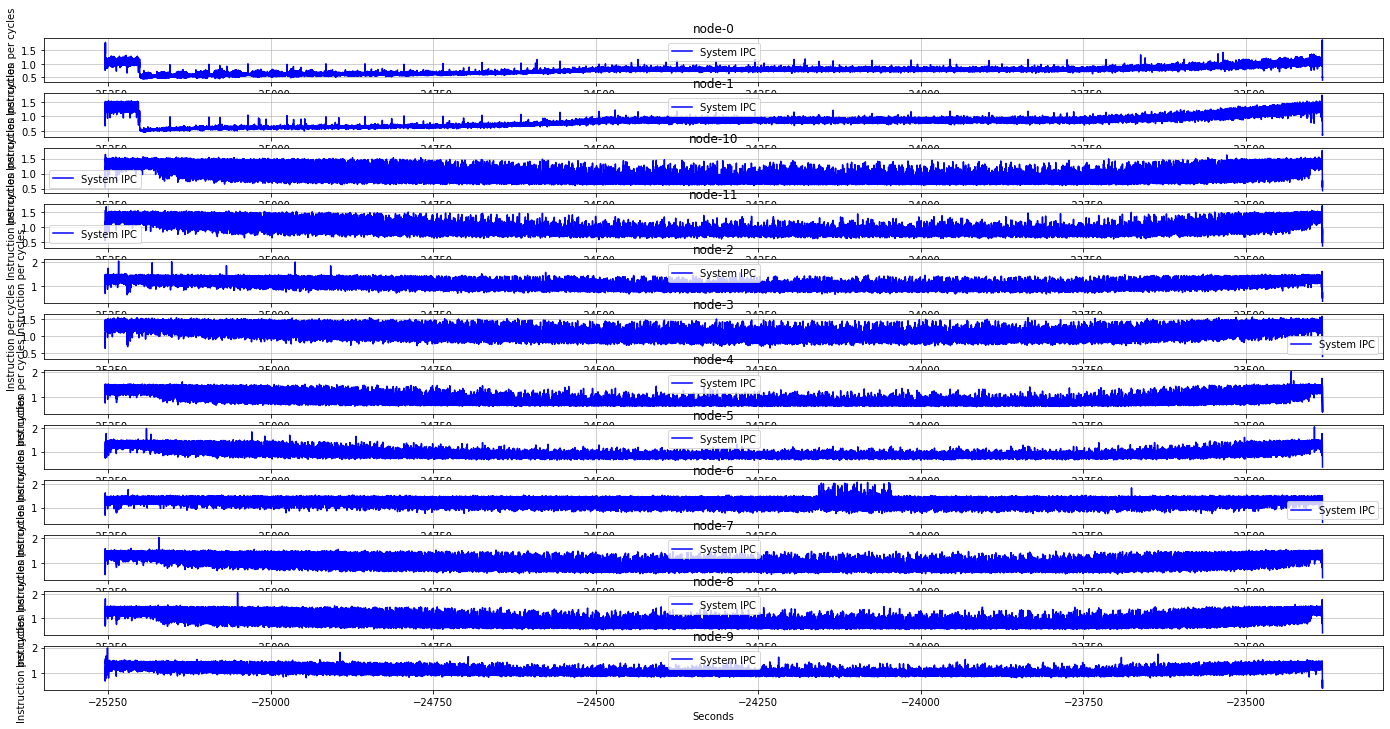

In [5]:
system_stats['System IPC'] = system_stats.apply(lambda r: float(r['System IPC']), axis=1)
fig = plt.figure(figsize=(24,12))
node_names = sorted(system_stats['Node Name'].unique())
df = system_stats.loc[:, ['System IPC', 'Node Name']]
for (i, node) in enumerate(node_names):
    dfi = df[(df['Node Name'] == node)]
    ax = fig.add_subplot(len(node_names), 1, i+1)
    ax.grid(alpha=0.75)
    dfi.plot(ax=ax, kind="line", title="%s" % node, xlabel="Seconds", ylabel="Instruction per cycles", color="blue", grid=True)
    plt.subplots_adjust(hspace=0.25)
